In [1]:
from population import PopulationGeneratorConfig, Distance, PopulationGenerationDistributionKind, PopulationGenerationEpicentre, generate_data_points
from clusters import Cluster, ClusterCentreStrategy
from pathing import get_paths_between_clusters, get_path_data, create_cluster_graph
from utils import visualize_clusters, visualize_points, visualize_paths
from travel import TravelGenerator
import h3
import pathlib
import folium
import osmnx
import networkx as nx

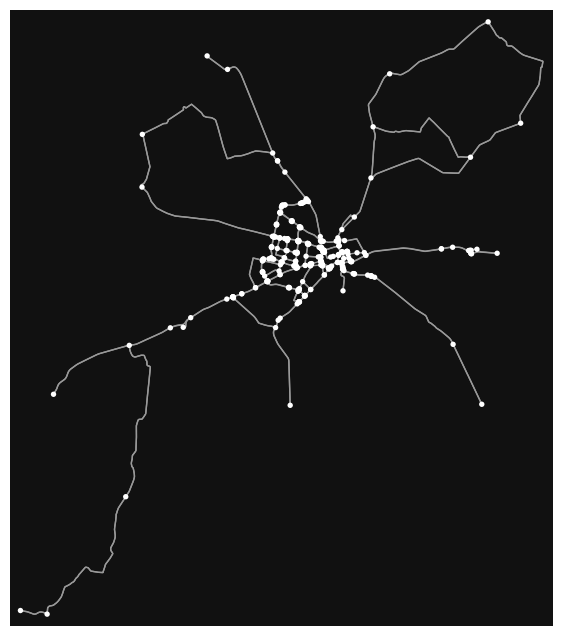

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
config = PopulationGeneratorConfig.from_json_file(pathlib.Path("configs/slupsk_2004.json"))
cluster_centre_strategy = ClusterCentreStrategy.HEXAGON_CENTER
pts_by_epi = {epi.label: generate_data_points(epi) for epi in config.epicentres}

colors = ["blue", "red", "green"]
pts_by_color = list(zip(colors, pts_by_epi.values()))
points = [point for pts in pts_by_epi.values() for point in pts]
places = [
    'Słupsk, Polska',
    'gmina Słupsk, Polska',
    'gmina Kobylnica, Polska',
]
custom_filter = '["highway"~"motorway|primary|secondary|tertiary"]'
# custom_filter = None
graph = osmnx.graph.graph_from_place(places, network_type="drive", custom_filter=custom_filter)
graph = osmnx.speed.add_edge_travel_times(osmnx.add_edge_speeds(graph))
# osmnx.speed.add_edge_travel_times(graph)
clusters = Cluster.clusterize_points(points, 8, cluster_centre_strategy)
osmnx.plot_graph(graph)

In [3]:
atlas = get_paths_between_clusters(graph, clusters)
paths = atlas.get_paths()

In [4]:
m = folium.Map(location=[54.46270136314862, 17.019373399360482], zoom_start=13, tiles='cartodbpositron')
visualize_paths(m, graph, paths)
visualize_clusters(m, clusters, ['green'])
visualize_points(m, [cluster.centre for cluster in clusters], ['red'])
m

In [5]:
osmnx.folium.plot_graph_folium(graph, graph_map=m)

In [6]:
cluster_graph = create_cluster_graph(graph, clusters, 8)

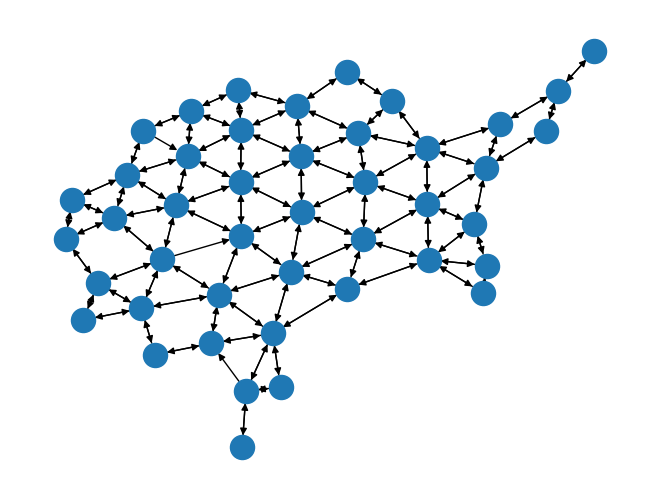

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(cluster_graph, seed=200)
nx.draw(cluster_graph, pos)
plt.show()

In [8]:
travels = TravelGenerator(config).generate_travels(clusters)
len(travels)

52002

In [9]:
travels[1]

Travel(start=Cluster(h3_hex_id='881f0d4563fffff', centre=Coordinates(latitude=54.45610623174949, longitude=17.021159878652487), points=[Coordinates(latitude=54.4532001047566, longitude=17.02590231189287), Coordinates(latitude=54.45903950067025, longitude=17.02225241022577), Coordinates(latitude=54.45795318543659, longitude=17.027011614376494), Coordinates(latitude=54.455663024021355, longitude=17.0251052738169), Coordinates(latitude=54.45707165030392, longitude=17.025728836263742), Coordinates(latitude=54.45970618152456, longitude=17.023062454323462), Coordinates(latitude=54.4573337205777, longitude=17.026773875095934), Coordinates(latitude=54.45673488467791, longitude=17.02253578588594), Coordinates(latitude=54.45404472676664, longitude=17.02483621151685), Coordinates(latitude=54.45596748379599, longitude=17.023858984218325), Coordinates(latitude=54.458424747271565, longitude=17.025390272128305), Coordinates(latitude=54.45955406819364, longitude=17.023613044382152), Coordinates(latitu

In [10]:
cluster_graph.nodes

NodeView(('881f0d4563fffff', '881f0d4529fffff', '881f0d4567fffff', '881f0d456bfffff', '881f0d450dfffff', '881f0d4505fffff', '881f0d4561fffff', '881f0d4501fffff', '881f0d4509fffff', '881f0d4547fffff', '881f0d4545fffff', '881f0d4543fffff', '881f0d4541fffff', '881f0d454dfffff', '881f0d454bfffff', '881f0d4569fffff', '881f0d4555fffff', '881f0d450bfffff', '881f0d455dfffff', '881f0d4093fffff', '881f0d452bfffff', '881f0d4521fffff', '881f0d452dfffff', '881f0d4503fffff', '881f0d4507fffff', '881f0d4549fffff', '881f0d4523fffff', '881f0d456dfffff', '881f0d409bfffff', '881f0d4e5bfffff', '881f0d4565fffff', '881f0d4097fffff', '881f0d4557fffff', '881f0d4551fffff', '881f0d4559fffff', '881f0d40b3fffff', '881f0d4e59fffff', '881f0d40bbfffff', '881f0d4091fffff', '881f0d40b7fffff', '881f0d40b1fffff', '881f0d4095fffff', '881f0d4e51fffff', '881f0d4e53fffff'))

In [11]:
for (a, b, dta) in cluster_graph.edges.data("data"):
    cluster_graph[a][b]["weight"] = dta.minimal_lane_count

In [12]:
for edge in cluster_graph.edges.data("weight"):
    print(edge)

('881f0d4563fffff', '881f0d4529fffff', 1)
('881f0d4563fffff', '881f0d4567fffff', 1)
('881f0d4563fffff', '881f0d456bfffff', 1)
('881f0d4563fffff', '881f0d450dfffff', 1)
('881f0d4563fffff', '881f0d4505fffff', 1)
('881f0d4563fffff', '881f0d4561fffff', 1)
('881f0d4529fffff', '881f0d4567fffff', 1)
('881f0d4529fffff', '881f0d4563fffff', 1)
('881f0d4529fffff', '881f0d452bfffff', 1)
('881f0d4529fffff', '881f0d4505fffff', 1)
('881f0d4529fffff', '881f0d4521fffff', 1)
('881f0d4529fffff', '881f0d452dfffff', 1)
('881f0d4567fffff', '881f0d4529fffff', 1)
('881f0d4567fffff', '881f0d4e5bfffff', 1)
('881f0d4567fffff', '881f0d4565fffff', 1)
('881f0d4567fffff', '881f0d4563fffff', 1)
('881f0d4567fffff', '881f0d4561fffff', 1)
('881f0d4567fffff', '881f0d452dfffff', 1)
('881f0d456bfffff', '881f0d4545fffff', 1)
('881f0d456bfffff', '881f0d4563fffff', 1)
('881f0d456bfffff', '881f0d4569fffff', 1)
('881f0d456bfffff', '881f0d450dfffff', 1)
('881f0d456bfffff', '881f0d4561fffff', 1)
('881f0d456bfffff', '881f0d4547fff